In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split, cross_val_score

In [27]:
# Read in the CSV file to the Notebook
df = pd.read_csv("NY-House-Dataset.csv", encoding='latin')

# Display the first few rows of the dataset
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [28]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [29]:
# Display the shape of the dataset
df.shape

(4801, 17)

### Data Cleaning

In [30]:
# Filtering Data

# Specify a collection of column names intended for filtering from the initial DataFrame. 
#These columns pertain to different characteristics of properties within the housing market of New York.

Columns_to_filter = ['TYPE', 'PRICE', 'BEDS', 'BATH', 'STATE', 'PROPERTYSQFT',
                  'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY',
                  'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
                  'LATITUDE', 'LONGITUDE']
"""
Columns that where excluded from the filtering process where BROKERTITLE,STATE, MAIN_ADDRESS, and FORMATTED_ADDRESS.
"""
df2 = df[Columns_to_filter]
df2.head()

,TYPE,PRICE,BEDS,BATH,STATE,PROPERTYSQFT,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,LATITUDE,LONGITUDE
0,Condo for sale,315000,2,2.000000,"New York, NY 10022",1400.0,New York County,New York,Manhattan,East 55th Street,Regis Residence,40.761255,-73.974483
1,Condo for sale,195000000,7,10.000000,"New York, NY 10019",17545.0,United States,New York,New York County,New York,West 57th Street,40.766393,-73.980991
2,House for sale,260000,4,2.000000,"Staten Island, NY 10312",2015.0,United States,New York,Richmond County,Staten Island,Sinclair Avenue,40.541805,-74.196109
3,Condo for sale,69000,3,1.000000,"Manhattan, NY 10022",445.0,United States,New York,New York County,New York,East 55th Street,40.761398,-73.974613
4,Townhouse for sale,55000000,7,2.373861,"New York, NY 10065",14175.0,United States,New York,New York County,New York,East 64th Street,40.767224,-73.969856


In [31]:
# Check for missing values
print(df.isnull().sum())

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


In [32]:
# Display the shape of the filtered dataset
df2.shape

(4801, 13)

In [33]:
# Summary statistics of numerical columns
print(df.describe())

              PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450  


### **Summary** of df2 using describe()

The `describe()` function provides a statistical summary of the DataFrame `df2`. This summary includes count, mean, standard deviation (std), minimum (min), 25th percentile, 50th percentile (median), 75th percentile, and maximum (max) for each numeric column.

Insights: 
    
1. **Count**:
    - There are 4,801 entries in the dataset for each variable, indicating no missing values.

2. **Mean**:
    - The average price of properties is approximately $2.36 million.
    - The average number of bedrooms per property is around 3.36.
    - The average number of bathrooms per property is approximately 2.37.
    - The average property size is approximately 2184 square feet.

3. **Standard Deviation (Std)**:
    - The standard deviation of property prices is approximately $31.36 million, indicating a wide range of prices.
    - The standard deviations for bedrooms (approx. 2.60), bathrooms (approx. 1.95), and property sizes (approx. 2377 sqft) highlight substantial variability in these attributes across the dataset, indicating diverse options for potential buyers or investors.

4. **Minimum (Min)**:
    - The minimum values for price ($2,494), bedrooms (1), bathrooms (0), and property size (230 sqft) provide insight into the lower bounds of these attributes within the dataset, indicating the range of affordability and property configurations available.

5. **Percentiles (24%, 50%, 75%)**:
    - The quartile summaries provide insights into the distribution of property attributes: for price, 24%, 50%, and 75% of properties are priced below  $499 million, $825 million, and $1.4 million respectively; for bedrooms and bathrooms, 25%, 50%, and 75% have 2 or fewer, 3, and 4 or fewer respectively; for property size, 25%, 50%, and 75% are 1200 sqft or smaller, approximately 2184 sqft, and 2184 sqft or smaller respectively.

6. **Maximum Values (Max)**:
    - The maximum values showcase the upper limits within the dataset: property prices peak at approximately $2.147 billion, while the maximum number of bedrooms and bathrooms reaches 50 each, and property size tops at 65,535 square feet.


### Exploratory Data Analysis (EDA)

In [34]:
# Grouping the data by 'SUBLOCALITY' and calculating mean values for price, beds, baths, and property square feet
grouped_data = df2.groupby('SUBLOCALITY').agg({
    'PRICE': 'mean',
    'BEDS': 'mean',
    'BATH': 'mean',
    'PROPERTYSQFT': 'mean'
}).reset_index()

# Sorting the data by average price for visualization
Sorted_df3 = grouped_data.sort_values(by='PRICE', ascending=False)

# Display the top 10 sublocalities by average price
Sorted_df3.head(10)

,SUBLOCALITY,PRICE,BEDS,BATH,PROPERTYSQFT
12,New York County,1.019120e+07,5.174825,4.361713,4574.345308
4,Dumbo,5.799000e+06,3.000000,4.000000,2497.000000
16,Richmond County,5.427598e+06,3.604167,2.654306,2239.658310
10,Manhattan,3.609905e+06,2.142857,2.190476,1893.983947
11,New York,2.534033e+06,2.369094,1.919154,1891.138120
9,Kings County,1.795465e+06,4.880330,3.174720,2653.243844
14,Queens County,1.135774e+06,4.216374,2.731461,2305.193441
0,Bronx County,1.020866e+06,4.745928,2.776314,2667.553928
8,Jackson Heights,9.850000e+05,3.000000,2.000000,2184.207862
1,Brooklyn,8.646435e+05,2.148707,1.587799,1331.868631


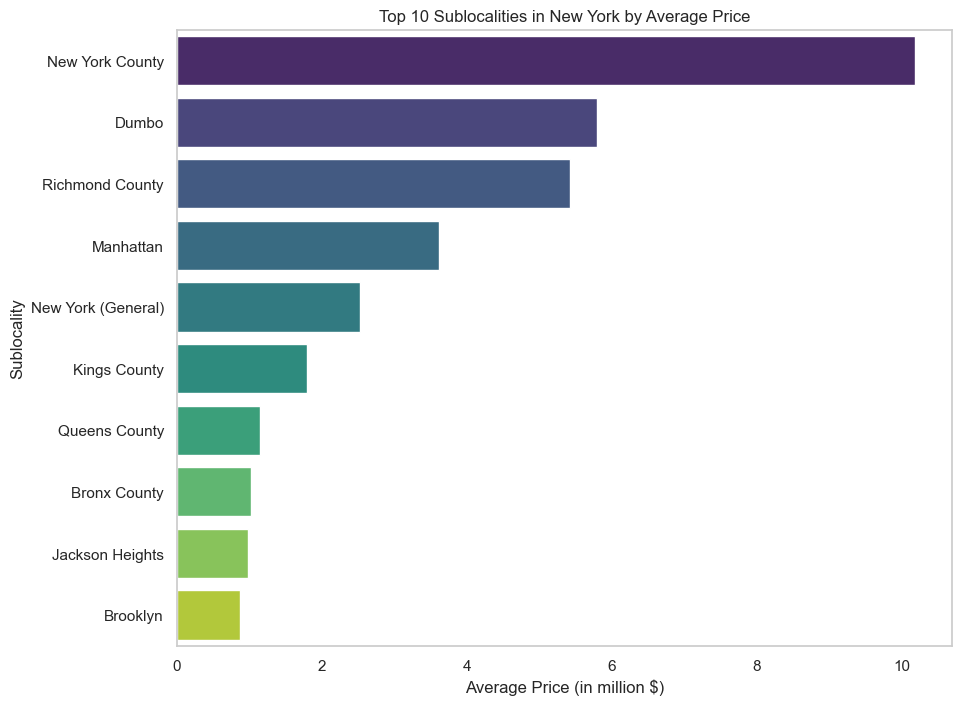

In [35]:
# Top 10 Sublocalities in New York by Average Price
data = {
    "Sublocality": ["New York County", "Dumbo", "Richmond County", "Manhattan", "New York (General)", "Kings County", 
                    "Queens County", "Bronx County", "Jackson Heights", "Brooklyn"],
    "Average Price": [10.19, 5.8, 5.43, 3.61, 2.53, 1.8, 1.14, 1.02, 0.985, 0.865],
    "Average Bedrooms": [5.17, 3, 3.6, 2.14, 2.37, 4.88, 4.22, 4.75, 3, 2.15],
    "Average Bathrooms": [4.36, 4, 2.65, 2.19, 1.92, 3.17, 2.73, 2.78, 2, 1.59],
    "Average Property Size": [4574, 2497, 2239, 1893, 1891, 2653, 2305, 2667, 2184, 1331]
}
df_avg_areas = pd.DataFrame(data)

# visual Plot (Bar Chart)
plt.figure(figsize=(10, 8))
sns.barplot(x="Average Price", y="Sublocality", data=df_avg_areas, palette="viridis")
plt.title('Top 10 Sublocalities in New York by Average Price')
plt.xlabel('Average Price (in million $)')
plt.ylabel('Sublocality')
plt.grid(axis='x')

plt.savefig('plot_image_1.png')
plt.show()

## Insights on the Housing Market by Sublocality

### Top 10 Sublocalities by Average Price

1. **New York County**
   - Average Price: $10.19 million
   - Average Bedrooms: 5.17
   - Average Bathrooms: 4.36
   - Average Property Size: 4,574 sqft

2. **Dumbo**
   - Average Price: $5.8 million
   - Average Bedrooms: 3
   - Average Bathrooms: 4
   - Average Property Size: 2,497 sqft

3. **Richmond County**
   - Average Price: $5.43 million
   - Average Bedrooms: 3.60
   - Average Bathrooms: 2.65
   - Average Property Size: 2,239 sqft

4. **Manhattan**
   - Average Price: $3.61 million
   - Average Bedrooms: 2.14
   - Average Bathrooms: 2.19
   - Average Property Size: 1,893 sqft

5. **New York (General)**
   - Average Price: $2.53 million
   - Average Bedrooms: 2.37
   - Average Bathrooms: 1.92
   - Average Property Size: 1,891 sqft

6. **Kings County**
   - Average Price: $1.80 million
   - Average Bedrooms: 4.88
   - Average Bathrooms: 3.17
   - Average Property Size: 2,653 sqft

7. **Queens County**
   - Average Price: $1.14 million
   - Average Bedrooms: 4.22
   - Average Bathrooms: 2.73
   - Average Property Size: 2,305 sqft

8. **Bronx County**
   - Average Price: $1.02 million
   - Average Bedrooms: 4.75
   - Average Bathrooms: 2.78
   - Average Property Size: 2,667 sqft

9. **Jackson Heights**
   - Average Price: $985,000
   - Average Bedrooms: 3
   - Average Bathrooms: 2
   - Average Property Size: 2,184 sqft

10. **Brooklyn**
    - Average Price: $865,000
    - Average Bedrooms: 2.15
    - Average Bathrooms: 1.59
    - Average Property Size: 1,331 sqft


In [36]:
# Average Prices by Property Type
col = 'TYPE'

# Group by 'TYPE' and calculate the average prices
average_prices = df2.groupby(col)['PRICE'].mean().sort_values(ascending=False)

# Converting the series to a DataFrame
average_prices_df = pd.DataFrame({'Type': average_prices.index, 'Average Price': average_prices.values})


print("List of Average Prices:")
print(average_prices_df)


List of Average Prices:
                          Type  Average Price
0           Townhouse for sale   6.365925e+06
1               House for sale   3.684216e+06
2               Condo for sale   2.630710e+06
3                     For sale   1.954536e+06
4   Multi-family home for sale   1.680428e+06
5                  Foreclosure   1.343010e+06
6                      Pending   1.340867e+06
7        Mobile house for sale   1.288000e+06
8                  Coming Soon   1.172000e+06
9               Co-op for sale   1.100418e+06
10               Land for sale   1.073021e+06
11             Condop for sale   9.986000e+05
12                  Contingent   8.825717e+05


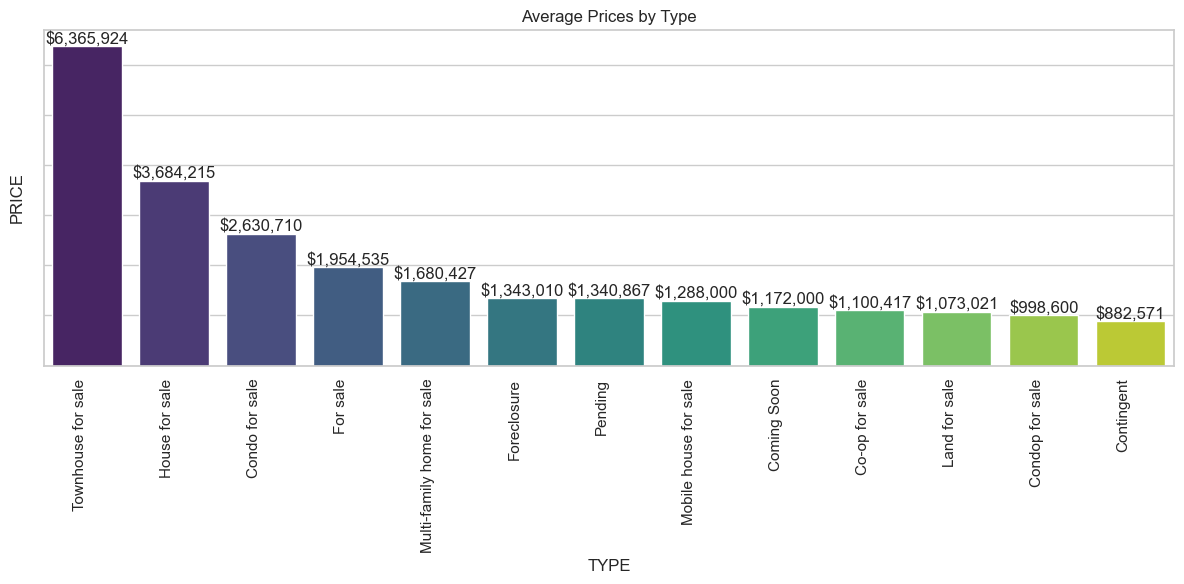

In [37]:
# Visualize Average Prices by Property Type

sns.set(rc={'figure.figsize':(12, 6)})
sns.set(style="whitegrid")
axs = sns.barplot(data=df2, x=col, y='PRICE', order=average_prices.index, palette='viridis', errorbar=None)

# Add labels 
for bar, avg_price in zip(axs.patches, average_prices):
    height = bar.get_height()
    axs.text(bar.get_x() + bar.get_width() / 2, height, f'${int(avg_price):,}', ha='center', va='bottom')

axs.set(yticklabels=[])
axs.set_xticklabels(axs.get_xticklabels(), rotation=90, ha="right")
axs.set_title("Average Prices by Type")
plt.tight_layout()

plt.savefig('plot_image_2.png')
plt.show()

### Insights on the Average Prices by Property Type

1. **Townhouse for sale:** The average price for townhouses is approximately $6.37 million.
    
2. **House for sale:** Houses have an average price of around $3.68 million.
    
3. **Condo for sale:** Condominiums have an average price of about $2.63 million.
    
4. **For sale:** Properties listed for sale without a specific type have an average price of approximately $1.95 million.
    
5. **Multi-family home for sale:** The average price for multi-family homes is around $1.68 million.
    
6. **Foreclosure:** Foreclosed properties have an average price of about $1.34 million.
    
7. **Pending:** Properties with pending status have an average price of approximately $1.34 million.
    
8. **Mobile house for sale:** Mobile homes listed for sale have an average price of $1.29 million.
    
9. **Coming Soon:** Properties listed as "Coming Soon" have an average price of around $1.17 million.
    
10. **Co-op for sale:** Cooperative apartments have an average price of about $1.10 million.
    
11. **Land for sale:** The average price for land listed for sale is approximately $1.07 million.
    
12. **Condo for sale:** Condos have an average price of $998 thousand.
    
13. **Contingent:** Properties with contingent status have an average price of about $882 thousand.
    

#### Conclusion:
The data highlights the significant variation in average prices across different property types. Townhouses, houses, and condos tend to have higher average prices compared to other property types. This information can be valuable for individuals interested in understanding the average market prices for various types of properties.


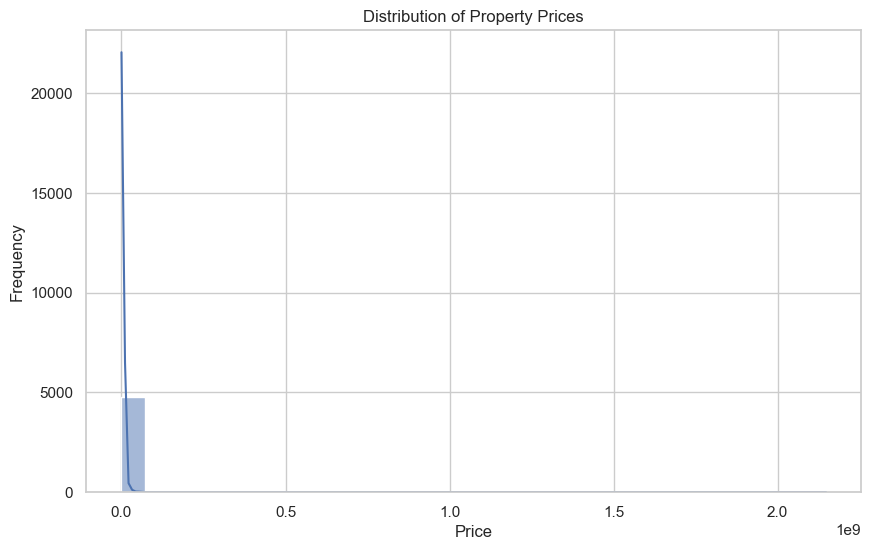

In [38]:
# Visualize distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.savefig('plot_image_3.png')
plt.show()

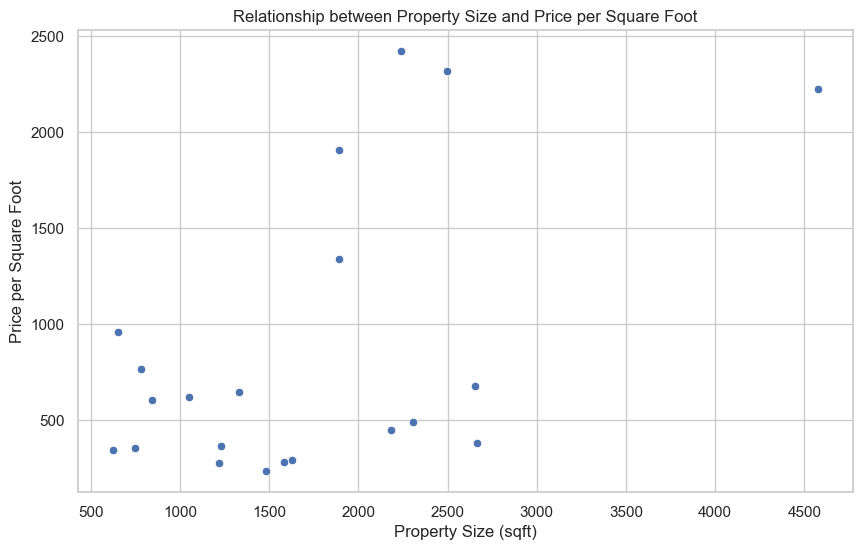

In [39]:
# Iterative Analysis
# Example: Explore additional variables or data sources

# Calculate price per square foot
Sorted_df3['PRICE_PER_SQFT'] = Sorted_df3['PRICE'] / Sorted_df3['PROPERTYSQFT']

# Visualize the relationship between price per square foot and other variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE_PER_SQFT', data=Sorted_df3)
plt.title('Relationship between Property Size and Price per Square Foot')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Price per Square Foot')

plt.savefig('plot_image_4.png')
plt.show()

### Market Segmentation

In [40]:
# Segment data based on property type
property_types = df['TYPE'].unique()
for p_type in property_types:
    subset = df[df['TYPE'] == p_type]
    
print(subset.head())

                                            BROKERTITLE             TYPE  \
2422                    Brokered by Keller Williams NYC  Condop for sale   
2696  Brokered by Brown Harris Stevens - 445 Park Av...  Condop for sale   
4276                Brokered by City Connections Realty  Condop for sale   
4735                    Brokered by Weichert Properties  Condop for sale   
4747                    Brokered by Weichert Properties  Condop for sale   

        PRICE  BEDS  BATH  PROPERTYSQFT                 ADDRESS  \
2422   598000     1   1.0   2184.207862   333 E 46th St Apt 17E   
2696  1065000     2   2.0   2184.207862  215 E 96th St Unit 25C   
4276  1080000     1   1.0   2184.207862   310 E 46th St Apt 23U   
4735  1125000     3   1.0   2184.207862    7 Second Ave Unit 3C   
4747  1125000     3   1.0   2184.207862    7 Second Ave Unit 3C   

                    STATE                               MAIN_ADDRESS  \
2422   New York, NY 10017    333 E 46th St Apt 17ENew York, NY 10017

### Statistical Analysis

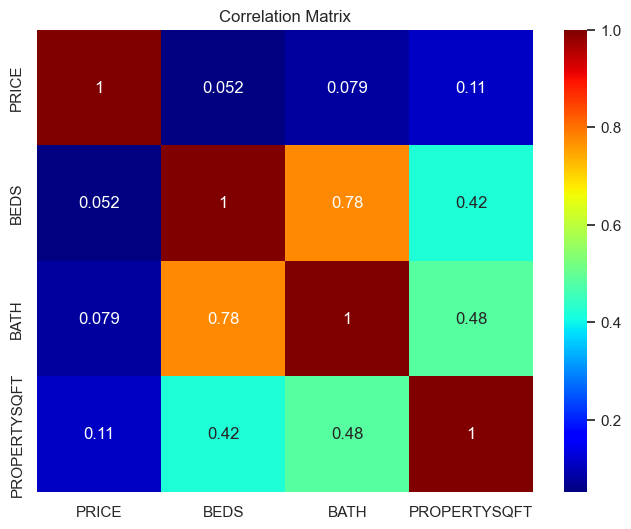

In [41]:
# Correlation Analysis
corr_columns = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
correlation = df2[corr_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='jet')
plt.title('Correlation Matrix')

plt.savefig('plot_image_5.png')
plt.show()

#### Based on the correlation matrix:

1. **Bedrooms and Bathrooms Correlation:**
   - Bedrooms and Bathrooms have a relatively strong positive correlation of 0.78.
   - This indicates that as the number of bedrooms increases, the number of bathrooms tends to increase as well, and vice versa.
   - This correlation suggests that properties with more bedrooms are likely to have more bathrooms, which is a common trend in real estate.

2. **Price and Property Size:**
   - Price and Property Size (Propertysqft) have a moderate positive correlation of 0.11.
   - While this correlation is positive, it is relatively weak compared to the correlations between Bedrooms/Bathrooms or Beds/Baths.
   - This suggests that there is some tendency for larger properties to have higher prices, but the relationship is not very strong.


3. **Conclusion:**
   - The strong positive correlation between Bedrooms and Bathrooms suggests a close relationship, likely influenced by architectural standards or market demands.
   - While a moderate positive correlation exists between Price and Property Size, indicating larger properties tend to have higher prices, other factors like location, amenities, and property condition also significantly influence prices.
   - These correlations provide insights for real estate decisions, but additional factors must be considered for a comprehensive understanding of the market dynamics.


### Outliers Removal

In [42]:
# Checking the Shape before removing outliers
selected_columns = ['SUBLOCALITY', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
selected_data = df2[selected_columns]

# Check the shape of the DataFrame
print(selected_data.shape)

(4801, 5)


In [43]:
# Selecting relevant columns from df2
selected_columns = ['SUBLOCALITY', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
ny_data = df2[selected_columns].copy()

# Outlier treatment 
numeric_columns = ny_data.select_dtypes(include=[np.number]).columns
Q1_numeric, Q3_numeric = np.percentile(ny_data[numeric_columns], [25, 75], axis=0)
IQR_numeric = Q3_numeric - Q1_numeric
outlier_cutoff_numeric = 2 * IQR_numeric

# Filtering outliers
outlier_mask = (ny_data[numeric_columns] < (Q1_numeric - outlier_cutoff_numeric)) | (ny_data[numeric_columns] > (Q3_numeric + outlier_cutoff_numeric))
ny_data_filtered = ny_data[~outlier_mask.any(axis=1)]

# One-hot  encoding 'SUBLOCALITY' column 
ny_data_filtered = pd.get_dummies(ny_data_filtered, columns=['SUBLOCALITY'])

# Checking the shape and head of the filtered dataset
print(ny_data_filtered.shape)
print(ny_data_filtered.head())


(4147, 24)
    PRICE  BEDS  BATH  PROPERTYSQFT  SUBLOCALITY_Bronx County  \
0  315000     2   2.0   1400.000000                     False   
2  260000     4   2.0   2015.000000                     False   
3   69000     3   1.0    445.000000                     False   
5  690000     5   2.0   4004.000000                     False   
6  899500     2   2.0   2184.207862                     False   

   SUBLOCALITY_Brooklyn  SUBLOCALITY_Brooklyn Heights  \
0                 False                         False   
2                 False                         False   
3                 False                         False   
5                 False                         False   
6                 False                         False   

   SUBLOCALITY_Coney Island  SUBLOCALITY_East Bronx  SUBLOCALITY_Flushing  \
0                     False                   False                 False   
2                     False                   False                 False   
3                     Fa

After outlier removal and feature engineering technique, our dataset has been refined to **4,147 observations, from 4,801**.

Overall, the dataset `ny_data_filtered` seems to be treated for outlier and binary encoding, making it suitable for further analysis, predictive modeling. The one-hot encoded columns allow for analysis based on different sublocalities, (the approach converts categorical text data into a True or False [1,0] format that can be provided to machine learning algorithms), while the numerical columns provide information about price, bedrooms, bathrooms, and property size. The data are crucial for real estate price prediction.


## Model Building

In [44]:
# Preparing the data for the model
X = ny_data_filtered.drop(['PRICE'], axis=1)  
X.head()

,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY_Bronx County,SUBLOCALITY_Brooklyn,SUBLOCALITY_Brooklyn Heights,SUBLOCALITY_Coney Island,SUBLOCALITY_East Bronx,SUBLOCALITY_Flushing,SUBLOCALITY_Fort Hamilton,...,SUBLOCALITY_New York,SUBLOCALITY_New York County,SUBLOCALITY_Queens,SUBLOCALITY_Queens County,SUBLOCALITY_Rego Park,SUBLOCALITY_Richmond County,SUBLOCALITY_Riverdale,SUBLOCALITY_Snyder Avenue,SUBLOCALITY_Staten Island,SUBLOCALITY_The Bronx
0,2,2.0,1400.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,2.0,2015.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3,1.0,445.000000,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,5,2.0,4004.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2,2.0,2184.207862,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [45]:
y = ny_data_filtered['PRICE']  # Target variable for Prediction
y.head()

0    315000
2    260000
3     69000
5    690000
6    899500
Name: PRICE, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Model : Simple linear regression and random forest regressor
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=10)

# Train the models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [48]:
# Train the Random Forest Regressor
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculate evaluation metrics for the Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2): {r2_rf}")

# Comparing, train and evaluate Linear Regression as well
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Model Comparison:")
print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2): {r2_rf}")

print("\nLinear Regression:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R2): {r2_linear}")

Random Forest Mean Squared Error (MSE): 160232385537.55515
Random Forest R-squared (R2): 0.5764095477584674
Model Comparison:
Random Forest Regressor:
Mean Squared Error (MSE): 160232385537.55515
R-squared (R2): 0.5764095477584674

Linear Regression:
Mean Squared Error (MSE): 187273330264.9731
R-squared (R2): 0.5049240863912295


Comparing the two models:

**Random Forest Regressor:** 
The Random Forest model has a lower MSE and higher R-squared compared to the Linear Regression model. This suggests that the Random Forest model performs better in terms of prediction accuracy and capturing the variability in property prices.

**Linear Regression:** 
Although the Linear Regression model has a higher MSE and lower R-squared compared to the Random Forest model, it still provides some level of predictive capability. However, its performance is inferior to that of the Random Forest model in this case.

Overall, based on these evaluation metrics, the Random Forest Regressor model appears to be more effective in predicting property prices compared to the Linear Regression model for the given dataset.


In [49]:
# Perform cross-validation
cv_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()
cv_mse_std = cv_scores.std()

print("\nCross-Validation Results:")
print(f"Mean Cross-Validated MSE: {cv_mse_mean}")
print(f"Standard Deviation of Cross-Validated MSE: {cv_mse_std}")


Cross-Validation Results:
Mean Cross-Validated MSE: 200263120329.3372
Standard Deviation of Cross-Validated MSE: 22304628221.421787


**Summary:**

The Random Forest Regressor model demonstrates promising performance in predicting property prices. With a mean cross-validated Mean Squared Error (MSE) of approximately 200 billion and a standard deviation of around 22 billion, the model exhibits relatively accurate predictions across various subsets of the dataset used in cross-validation. This suggests that the model captures important patterns and relationships within the data, enabling it to make reliable predictions of property prices. Overall, the Random Forest Regressor model shows potential as a valuable tool for forecasting property prices in real estate analysis, with consistent and satisfactory performance observed across different data subsets.


In [50]:
# Export cleaned dataset
ny_data_filtered.to_csv("NY_housing_cleaned_dataset.csv", index=False)